In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter1d

In [101]:
pop = pd.read_csv('data/nyc_population_thousands.csv')    #read a csv file
pop.head()

,Year,Total,Manhattan,Bronx,Brooklyn,Queens,Staten Island
0,1790,49.0,32.0,2.0,5.0,6.0,4.0
1,1800,79.0,61.0,2.0,6.0,7.0,5.0
2,1810,120.0,96.0,3.0,8.0,7.0,5.0
3,1820,152.0,123.0,3.0,11.0,8.0,6.0
4,1830,242.0,203.0,3.0,21.0,9.0,7.0


In [122]:
pop_smooth = pd.DataFrame(gaussian_filter1d(pop, sigma=1, axis=0)[:,1:],
                          columns= ['Total_s', 'Manhattan_s', 'Bronx_s', 'Brooklyn_s', 'Queens_s', 'Staten Island_s'])
                            
pop_smooth.head()

pop_new = pd.concat([pop, pop_smooth], axis = 1).set_index('Year')

In [123]:
pop_smooth.head()

,Total_s,Manhattan_s,Bronx_s,Brooklyn_s,Queens_s,Staten Island_s
0,62.523005,44.760349,2.063123,5.500767,6.363918,4.363918
1,84.752940,64.901270,2.300930,6.530169,6.767829,4.767695
2,121.533776,97.115447,2.709005,8.958694,7.324160,5.319460
3,177.074446,144.154072,3.074395,14.943276,8.312920,6.249263
4,277.753488,223.535875,3.846952,31.668811,10.501732,8.123849


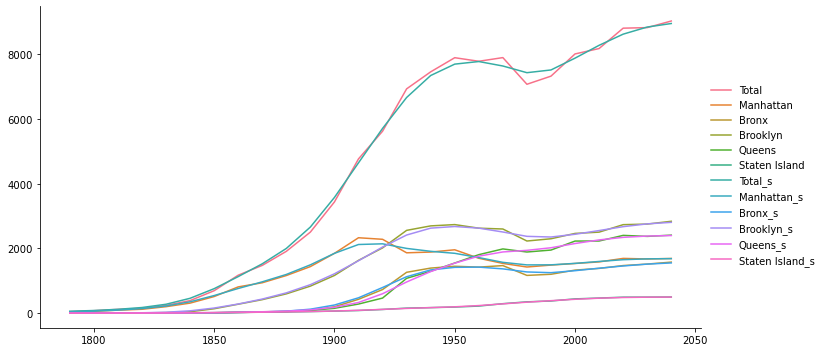

In [143]:
plt = sns.relplot(
    data=pop_new,
    kind="line", 
    height=5, aspect=2,
    dashes = False)

plt.savefig('figure_population.pdf')